# Product recommendation

In [4]:
#librairies
# classic Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import shutil

#sklearn utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
data_clicks = pd.read_csv("data/archive/clicks_sample.csv")
data_articles = pd.read_csv("data/archive/articles_metadata.csv")
display("------Dataclicks-------", data_clicks.head(),  "------Articles-------",  data_articles.head())

'------Dataclicks-------'

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


'------Articles-------'

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [20]:
print("--------SUMMARY DATA CLICKS------------", "\n",
      "DATA INFO" , "\n",  data_clicks.info(), "\n",
     "DATA DESCRIBE", "\n", data_clicks.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   user_id              1883 non-null   int64
 1   session_id           1883 non-null   int64
 2   session_start        1883 non-null   int64
 3   session_size         1883 non-null   int64
 4   click_article_id     1883 non-null   int64
 5   click_timestamp      1883 non-null   int64
 6   click_environment    1883 non-null   int64
 7   click_deviceGroup    1883 non-null   int64
 8   click_os             1883 non-null   int64
 9   click_country        1883 non-null   int64
 10  click_region         1883 non-null   int64
 11  click_referrer_type  1883 non-null   int64
dtypes: int64(12)
memory usage: 176.7 KB
--------SUMMARY DATA CLICKS------------ 
 DATA INFO 
 None 
 DATA DESCRIBE 
            user_id    session_id  session_start  session_size  \
count  1883.000000  1.883000e+03   1.8

In [26]:
#checking for null
print(
data_articles.isnull().sum(),
data_clicks.isnull().sum()
)

article_id       0
category_id      0
created_at_ts    0
publisher_id     0
words_count      0
dtype: int64 user_id                0
session_id             0
session_start          0
session_size           0
click_article_id       0
click_timestamp        0
click_environment      0
click_deviceGroup      0
click_os               0
click_country          0
click_region           0
click_referrer_type    0
dtype: int64


In [8]:
data_clicks.columns

Index(['user_id', 'session_id', 'session_start', 'session_size',
       'click_article_id', 'click_timestamp', 'click_environment',
       'click_deviceGroup', 'click_os', 'click_country', 'click_region',
       'click_referrer_type'],
      dtype='object')

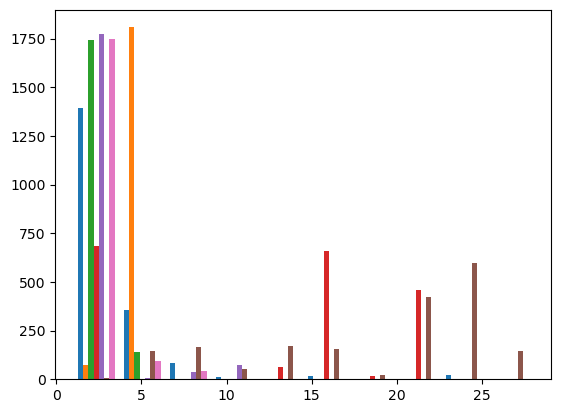

In [9]:
#plot variables to analyze on clicks
vars_to_analyze=["session_size", "click_environment", "click_deviceGroup", 'click_os', 'click_country', 'click_region',
       'click_referrer_type']
graph = plt.hist(data_clicks[vars_to_analyze])
plt.show()

In [10]:
data_articles.columns

Index(['article_id', 'category_id', 'created_at_ts', 'publisher_id',
       'words_count'],
      dtype='object')

In [12]:
data_articles["words_count"].describe()

count    364047.000000
mean        190.897727
std          59.502766
min           0.000000
25%         159.000000
50%         186.000000
75%         218.000000
max        6690.000000
Name: words_count, dtype: float64

C:\Users\kanam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


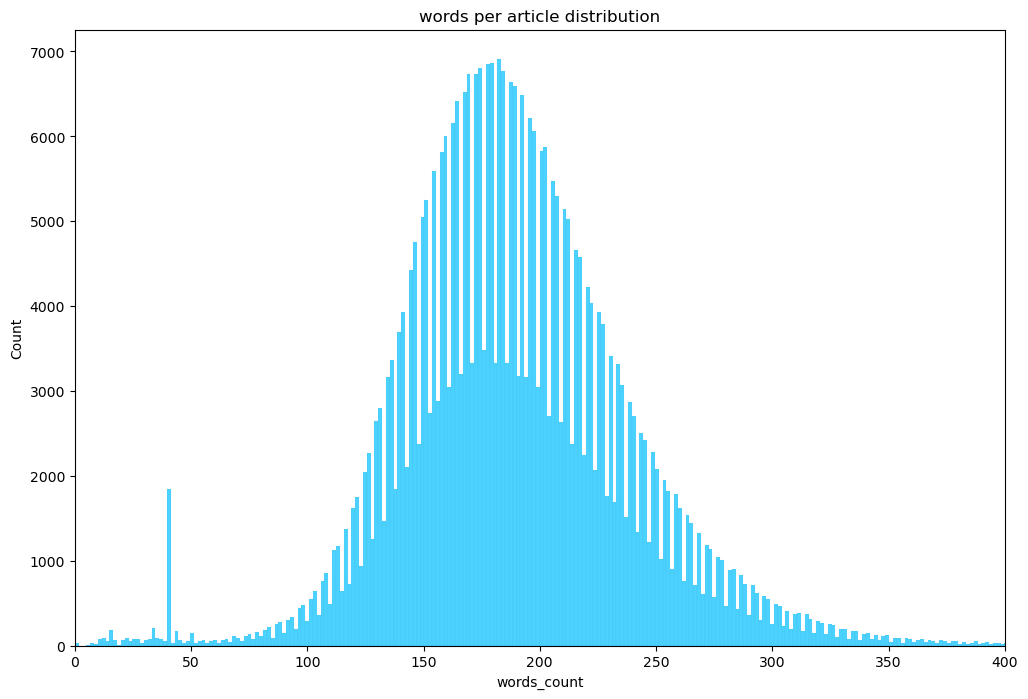

In [74]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.histplot(data_articles['words_count'],
            color="deepskyblue",
            edgecolor="black",
            alpha=0.7,
            ax=ax)

plt.xlim([0,400])
plt.title('words per article distribution');
plt.show()

In [76]:
#conversion timestamp into date IT'S IN "ms" unit!
data_clicks["click_timestamp"] = pd.to_datetime(data_clicks["click_timestamp"], unit="ms")

In [78]:
data_clicks["hour"]  = data_clicks["click_timestamp"].dt.hour
data_clicks["day"]   = data_clicks["click_timestamp"].dt.date
data_clicks["month"] = data_clicks["click_timestamp"].dt.to_period("M")

dup = data_clicks.duplicated(subset=["user_id","session_id","click_article_id","click_timestamp"]).sum()
print(f"Duplicates : {dup}")

Duplicates : 0


In [106]:
data_clicks["hour"].describe()

count    1883.000000
mean        3.285714
std         1.719162
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max        23.000000
Name: hour, dtype: float64

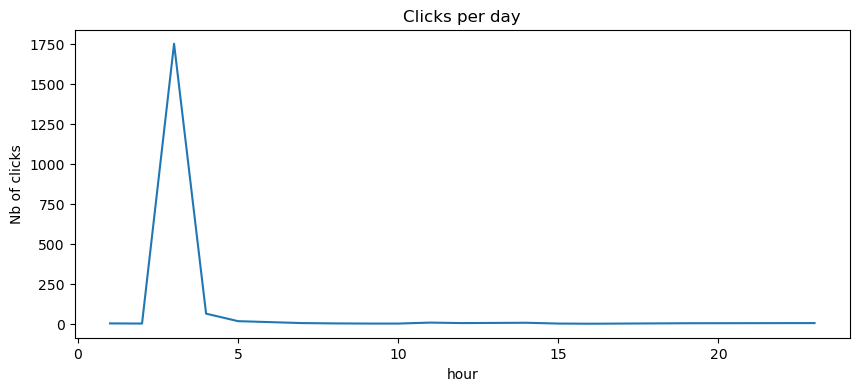

In [90]:
#Daily interaction analysis
daily = data_clicks.groupby("hour").size()
daily.plot(kind="line", figsize=(10,4), title="Clicks per day")
plt.ylabel("Nb of clicks")
plt.show()

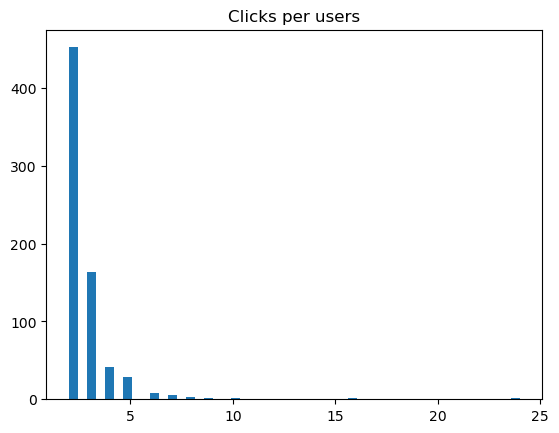

In [17]:
#User interaction analysis
clicks_per_user = data_clicks["user_id"].value_counts()
clicks_per_user.describe()
plt.hist(clicks_per_user, bins=50)
plt.title("Clicks per users")
plt.show()

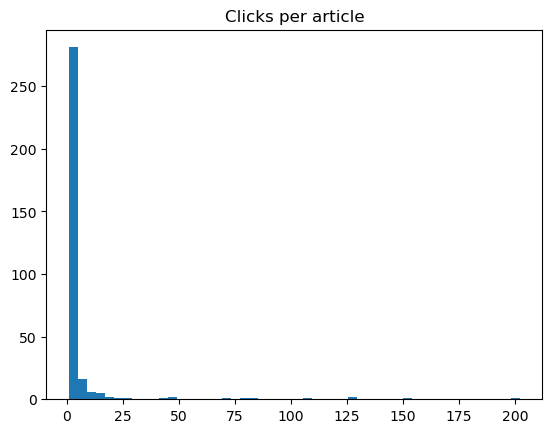

In [18]:
#Item interaction analysis
clicks_per_item = data_clicks["click_article_id"].value_counts()
clicks_per_item.describe()
plt.hist(clicks_per_item, bins=50)
plt.title("Clicks per article")
plt.show()

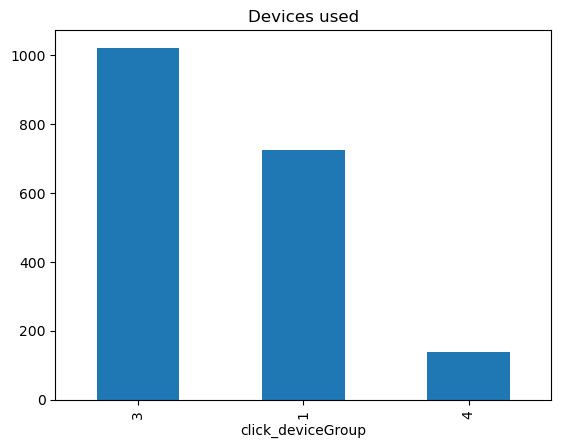

In [19]:
#what are those ??? 
data_clicks["click_deviceGroup"].value_counts().plot(kind="bar", title="Devices used")
plt.show()

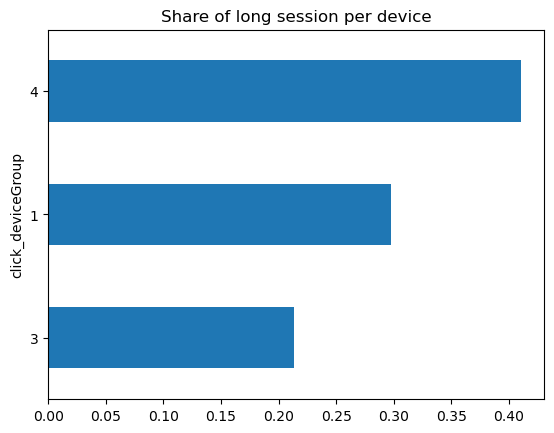

In [20]:
# ex. définir session “longue” si session_size ≥ seuil
threshold = data_clicks["session_size"].quantile(0.75)
long = data_clicks.assign(is_long = data_clicks["session_size"]>=threshold)
long.groupby("click_deviceGroup")["is_long"].mean().sort_values().plot(kind="barh")
plt.title("Share of long session per device")
plt.show()